# Capstone Project - Email Spam Detection
Content:
* Introduction
* Data cleaning
* Exploratory data analysis 
* Model building

### Introduction
In this work our group : Sabina, Nurzhan and Aruzhan tried to predict wether email letter is spam or not.Ready dataset is taken from <a href = "https://www.kaggle.com/somesh24/spambase"> kaggle </a>
<br>
Definitions of columns in dataset:
* 48 continuous real [0,100] attributes of type
wordfreqWORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A “word” in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

* 6 continuous real [0,100] attributes of type charfreqCHAR = percentage of characters in the e-mail that match CHAR, i.e. 100 (number of CHAR occurrences) / total characters in e-mail

* 1 continuous real [1,…] attribute of type capitalrunlength_average = average length of uninterrupted sequences of capital letters

* 1 continuous integer [1,…] attribute of type capitalrunlength_longest = length of longest uninterrupted sequence of capital letters

* 1 continuous integer [1,…] attribute of type capitalrunlength_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

* 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

In [30]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
import plotly.express as px

In [2]:
df = pd.read_csv('spambase_csv.csv', low_memory=False)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.shape

(4601, 58)

In [4]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Data cleaning

In [7]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

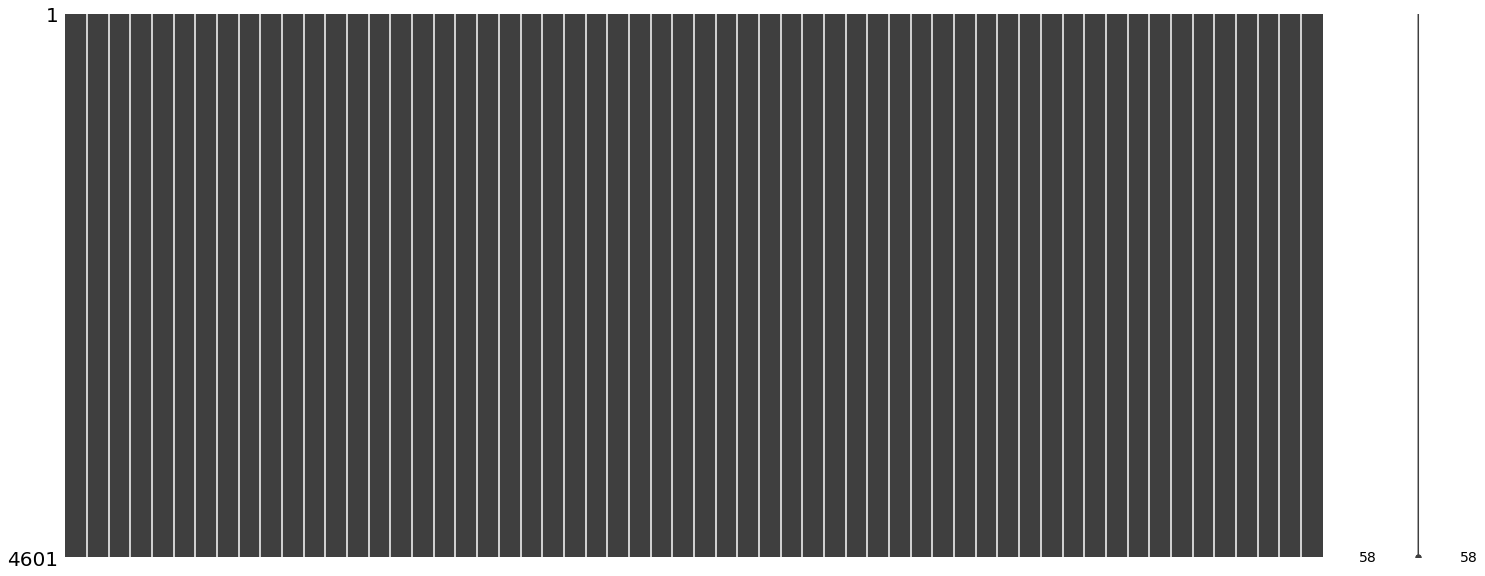

In [8]:
msno.matrix(df)

as we see in the cell above, our dataset doesn't has any null values which is good for us. So we can go to the next step<br>
### Exploratory data analysis 

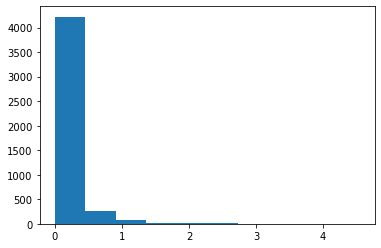

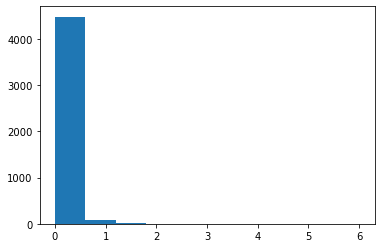

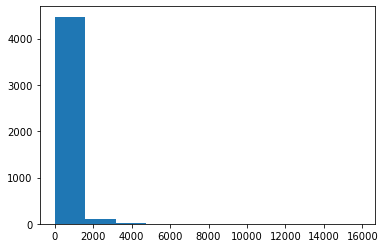

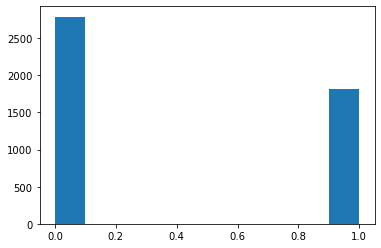

In [9]:
#Distribution graphs of sampled columns:
plt.hist(df['word_freq_make'])
plt.show()

plt.hist(df['char_freq_%24'])
plt.show()

plt.hist(df['capital_run_length_total'])
plt.show()

plt.hist(df['class'])
plt.show()

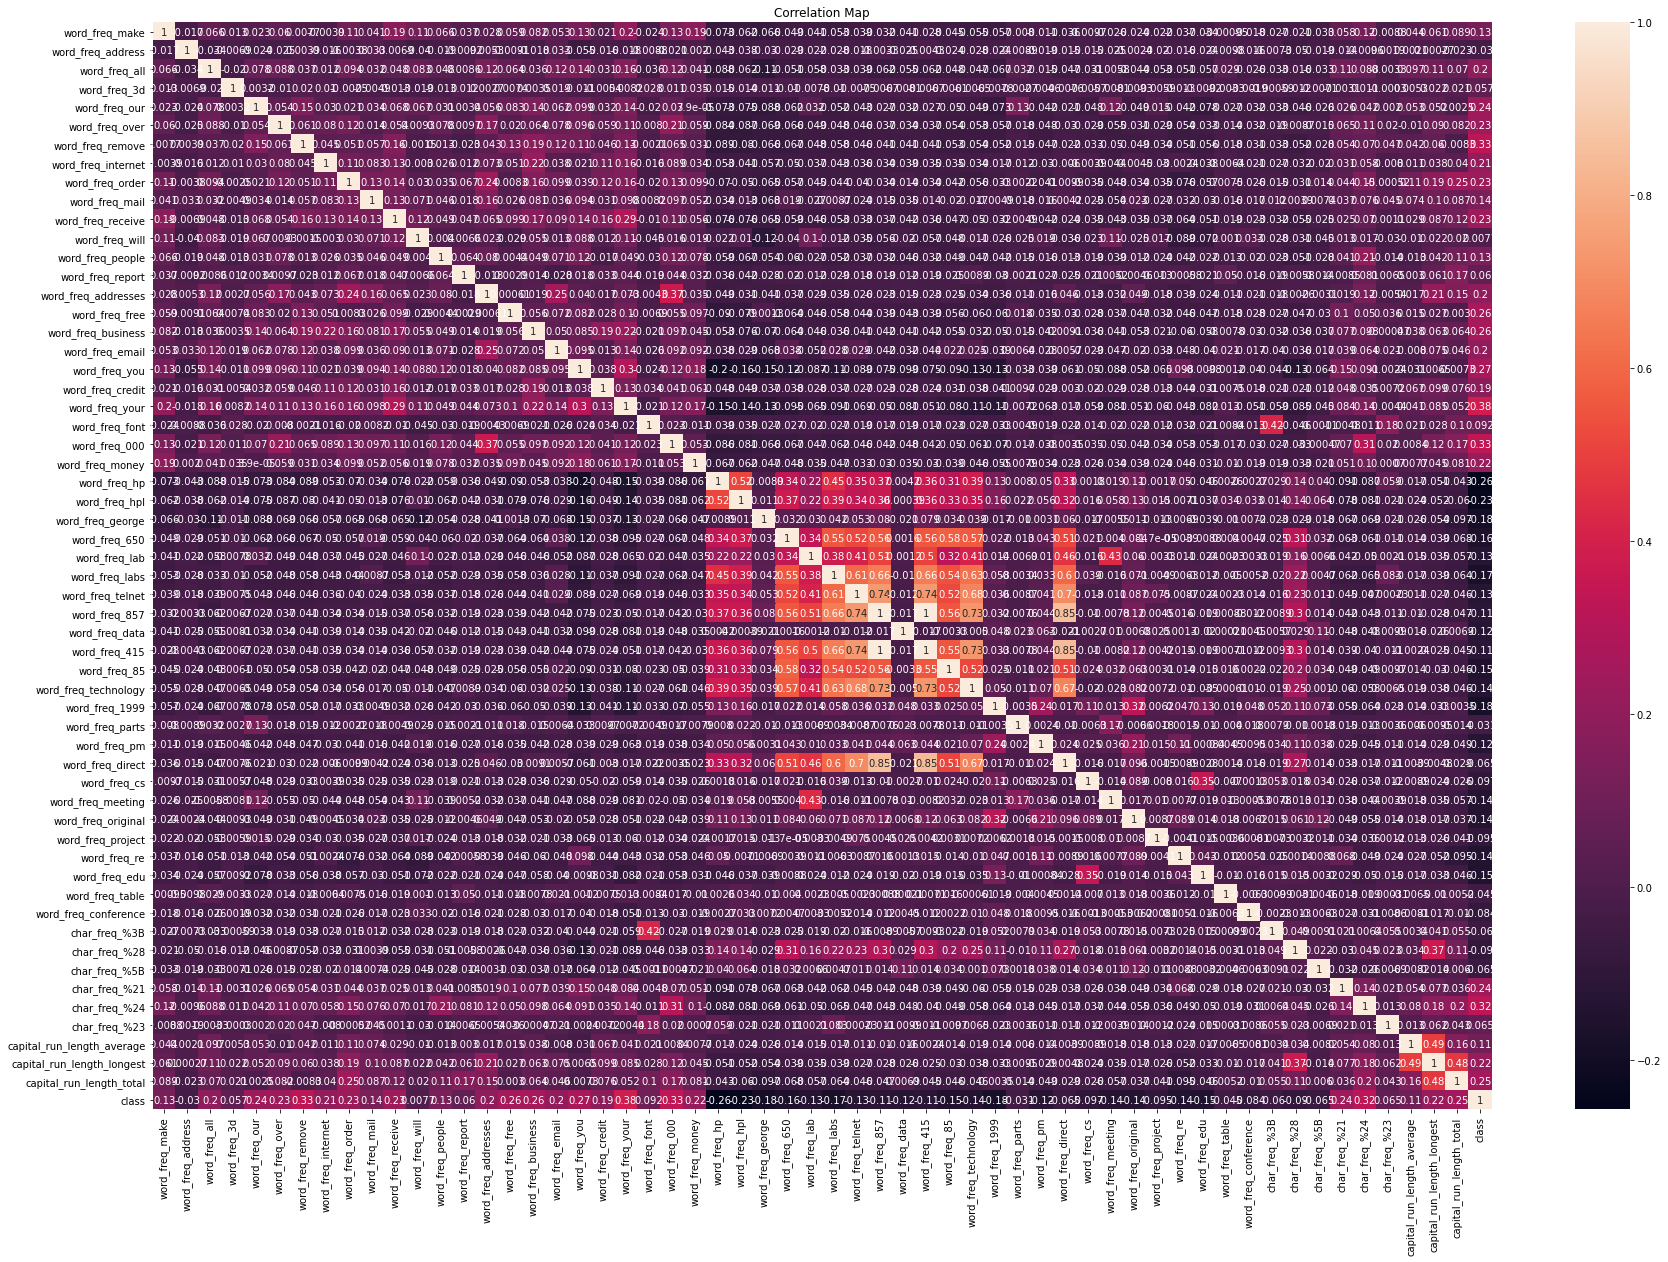

In [10]:
plt.figure(figsize=(30,20))
plt.title('Correlation Map')
heat = sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
#create a a dataframe to see the most correlated features with our predicting variable
correlation = abs(df.corr()["class"].sort_index()).reset_index().rename(columns= {"index":"feature"})
correlation.sort_values("class", ascending = False)

,feature,class
9,class,1.000000
57,word_freq_your,0.383234
10,word_freq_000,0.334787
50,word_freq_remove,0.332117
5,char_freq_%24,0.323629
56,word_freq_you,0.273651
29,word_freq_free,0.263215
20,word_freq_business,0.263204
31,word_freq_hp,0.256723
2,capital_run_length_total,0.249164


In [12]:
#select only those features which correlation values are equal or higher that 0.2 
estimated_features = correlation[correlation["class"] >= 0.2].feature.to_list()

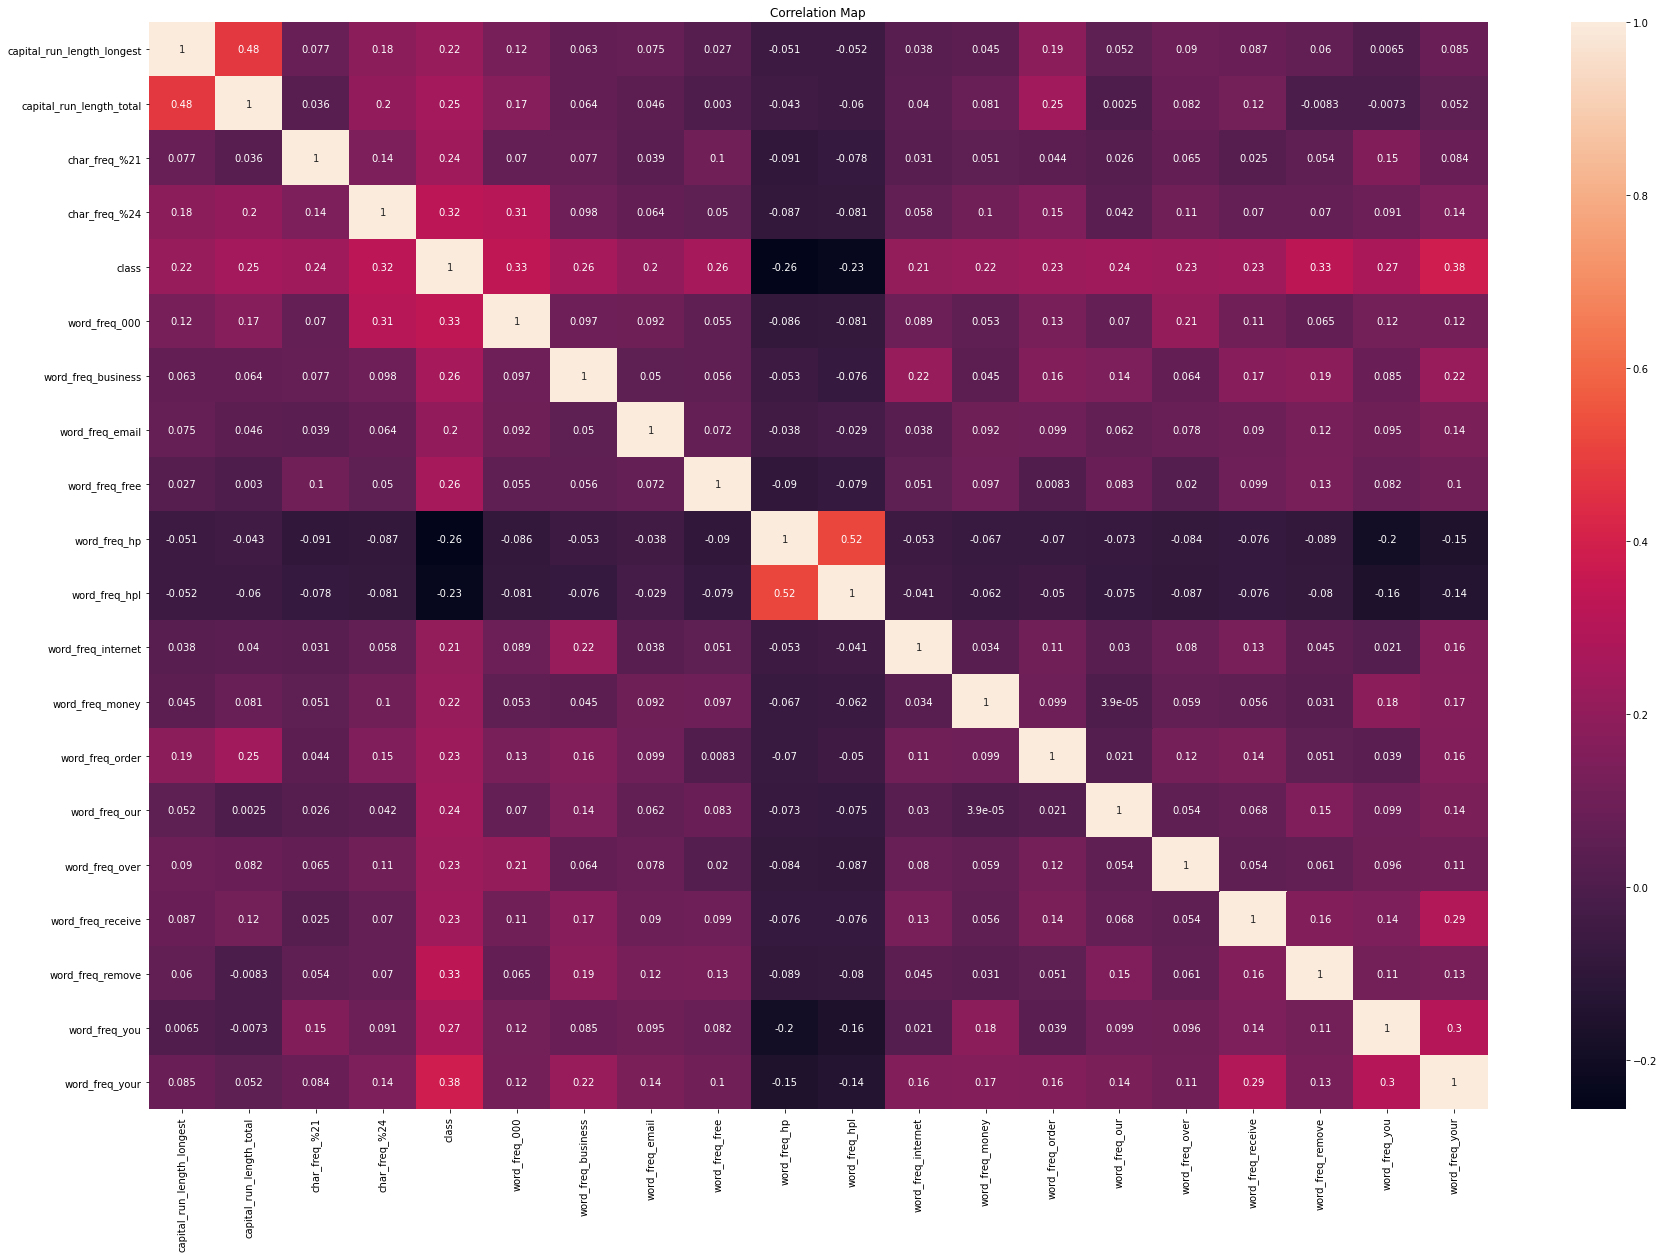

In [13]:
#plot correlation matrix for estimated features
plt.figure(figsize=(30,20))
plt.title('Correlation Map')
heat = sns.heatmap(df[estimated_features].corr(), annot=True)
plt.show()

### Model Building

In [14]:
# Split the dataset and labels into training and test sets
y = df.loc[:, 'class']
X = df.drop('class', axis=1)
#Create the scaling method
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=20)

In [16]:
# Fit the Logistic Regression  model to the training data
lg = LogisticRegression()
lg.fit(X_train, y_train)
#predict values of test data
pred = lg.predict(X_test)
# Score the model on the test data
lg_acc = lg.score(X_test, y_test)
print(lg_acc)

0.9123823316437364


In [17]:
# Now we will train the model based of the estimated features
X  = df[estimated_features]
y = df.loc[:, 'class']
#Create the scaling method
new_scaler = StandardScaler()
X = new_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=20)

In [19]:
# Fit the Logistic Regression  model to the training data
new_lg = LogisticRegression()
new_lg.fit(X_train, y_train)
#predict values of test data
pred = new_lg.predict(X_test)
# Score the model on the test data
new_lg_acc = new_lg.score(X_test, y_test)
print(new_lg_acc)

1.0


In [28]:
fig = px.bar(
    x=["Initial model","Based on estimated features"],
    y=[lg_acc, new_lg_acc],
    color=["Before","After"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Logistic Regression Accuracy Comparison")

fig.show()

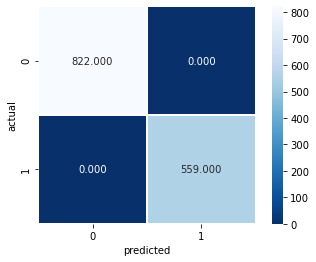

In [21]:
#plot the confusion matrix with the estimated param's
conf_mtx = metrics.confusion_matrix(y_test, pred)
sns.heatmap(conf_mtx, annot = True, fmt = ".3f", linewidths= .5, square = True, cmap = 'Blues_r')
plt.ylabel('actual')
plt.xlabel('predicted')
plt.show()

In [101]:
# Fit the k-nearest neighbors model to the training data
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
# Score the model on the test data
knn_acc = knn.score(X_test, y_test)
print(knn_acc)

0.9913106444605359


In [106]:
scores = cross_val_score(knn, X, y, cv = 15, scoring='accuracy')
print(scores)
print(scores.mean())

[0.99022801 0.99022801 0.99348534 0.98371336 0.99022801 0.98371336
 0.99674267 0.98371336 0.99022801 0.99674267 0.99348534 0.99673203
 0.99346405 0.99346405 0.99019608]
0.9910909568315203


In [107]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn, X, y, cv = 15, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

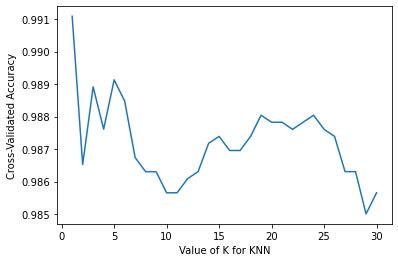

In [108]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')